In [ ]:
import gym
env = gym.make("Taxi-v3", render_mode = "human")

print(env.observation_space.n)
print(env.action_space.n)


for _ in range(1):
    observation = env.reset()[0]
    
    for _ in range(10):
        env.render() #GUI 출력
        action = env.action_space.sample()
        
        observation, reward, done, _, info = env.step(action)
        print("action", action, "reward", reward)
        
env.close()


In [14]:
import gym
import numpy
import random
from os import system, name
from time import sleep

# Define function to clear console window.
def clear(): 
  
    # Clear on Windows.
    if name == 'nt': 
        _ = system('cls')
  
    # Clear on Mac and Linux. (os.name is 'posix') 
    else: 
        _ = system('clear')

clear()

"""Setup"""

env = gym.make("Taxi-v3").env # Setup the Gym Environment

# Make a new matrix filled with zeros.
# The matrix will be 500x6 as there are 500 states and 6 actions.
q_table = numpy.zeros([env.observation_space.n, env.action_space.n])

training_episodes = 20000 # Amount of times to run environment while training.
display_episodes = 10 # Amount of times to run environment after training.

# Hyperparameters
alpha = 0.1 # Learning Rate
gamma = 0.6 # Discount Rate
epsilon = 0.1 # Chance of selecting a random action instead of maximising reward.

# For plotting metrics
all_epochs = []
all_penalties = []

"""Training the Agent"""

for i in range(training_episodes):    
    state = env.reset()[0] # Reset returns observation state and other info. We only need the state.
    done = False
    penalties, reward, = 0, 0
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Pick a new action for this state.
        else:
            action = numpy.argmax(q_table[state]) # Pick the action which has previously given the highest reward.

        next_state, reward, done, _, info = env.step(action) 
        
        old_value = q_table[state, action] # Retrieve old value from the q-table.
        next_max = numpy.max(q_table[next_state])

        # Update q-value for current state.
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10: # Checks if agent attempted to do an illegal action.
            penalties += 1

        state = next_state
        
    if i % 100 == 0: # Output number of completed episodes every 100 episodes.
        print(f"Episode: {i}")

print("Training finished.\n")

"""Display and evaluate agent's performance after Q-learning."""

total_epochs, total_penalties = 0, 0

for _ in range(display_episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0   
    done = False
    
    while not done:
        action = numpy.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1
        clear()
        env.render()
        print(f"Timestep: {epochs}")
        print(f"State: {state}")
        print(f"Action: {action}")
        print(f"Reward: {reward}")
        sleep(0.15) # Sleep so the user can see the 

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {display_episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / display_episodes}")
print(f"Average penalties per episode: {total_penalties / display_episodes}")

Episode: 0
Episode: 100
Episode: 200
Episode: 300
Episode: 400
Episode: 500
Episode: 600
Episode: 700
Episode: 800
Episode: 900
Episode: 1000
Episode: 1100
Episode: 1200
Episode: 1300
Episode: 1400
Episode: 1500
Episode: 1600
Episode: 1700
Episode: 1800
Episode: 1900
Episode: 2000
Episode: 2100
Episode: 2200
Episode: 2300
Episode: 2400
Episode: 2500
Episode: 2600
Episode: 2700
Episode: 2800
Episode: 2900
Episode: 3000
Episode: 3100
Episode: 3200
Episode: 3300
Episode: 3400
Episode: 3500
Episode: 3600
Episode: 3700
Episode: 3800
Episode: 3900
Episode: 4000
Episode: 4100
Episode: 4200
Episode: 4300
Episode: 4400
Episode: 4500
Episode: 4600
Episode: 4700
Episode: 4800
Episode: 4900
Episode: 5000
Episode: 5100
Episode: 5200
Episode: 5300
Episode: 5400
Episode: 5500
Episode: 5600
Episode: 5700
Episode: 5800
Episode: 5900
Episode: 6000
Episode: 6100
Episode: 6200
Episode: 6300
Episode: 6400
Episode: 6500
Episode: 6600
Episode: 6700
Episode: 6800
Episode: 6900
Episode: 7000
Episode: 7100
Epis

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Episode 0 Total Reward: -924
Episode 50 Total Reward: -40
Episode 100 Total Reward: 13
Episode 150 Total Reward: 8
Episode 200 Total Reward: 8
Episode 250 Total Reward: 10
Episode 300 Total Reward: 10
Episode 350 Total Reward: 11
Episode 400 Total Reward: 6
Episode 450 Total Reward: 5
Episode 500 Total Reward: 6
Episode 550 Total Reward: 4
Episode 600 Total Reward: 4
Episode 650 Total Reward: 1
Episode 700 Total Reward: 10
Episode 750 Total Reward: 9
Episode 800 Total Reward: 7
Episode 850 Total Reward: 4
Episode 900 Total Reward: 6
Episode 950 Total Reward: 8


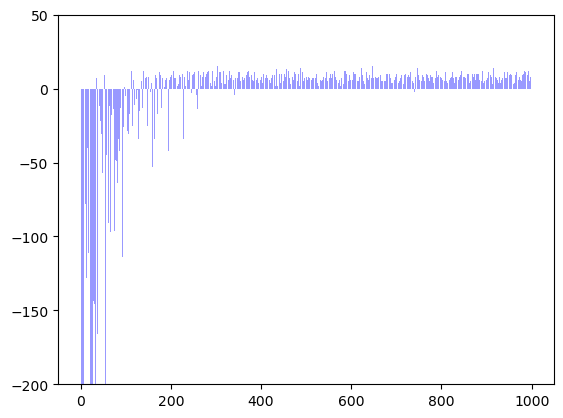

In [15]:
# 답
import gym 
env = gym.make("Taxi-v3" ) # , render_mode='human') 

import numpy as np       
Q = np.zeros([env.observation_space.n, env.action_space.n])   #[ 총 상태 수, action 수 ]  즉, [500,6] 

G = 0 ;  rList =[]  
dis = 0.618
for episode in range(1000): 
	done = False
	G, reward = 0, 0
	state = env.reset()[0] 
	while done != True:
		action = np.argmax(Q[state])
		state2, reward, done, _, info = env.step(action) 
		Q[state, action]  = dis * (reward + np.max(Q[state2])  )
		G += reward
		state = state2     
	rList.append(G) 
	if episode % 50 == 0:
		print('Episode {} Total Reward: {}'.format(episode, G))
import matplotlib.pyplot as plt
plt.bar(range(len(rList)), rList, color='b', alpha=0.4)
plt.ylim(-200,50)
plt.show()